In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

In [2]:
raw_data = pd.read_csv('data.csv')
raw_data.columns = ['Benchmark', 'Baseline', 'Griffin']
raw_data

Benchmark  Baseline  Griffin
0        bs      2676     1168
1        km      6224      747
2       bfs         1        1
3       fir      2595     1599
4       flw      2575     1424
5        mt      8192      768
6        pr         1        1
7        fw      3078     2201
8        st      7135     2474
9        sc       409      364

In [3]:
stacked_data = raw_data
stacked_data['Griffin'] = stacked_data['Griffin']/stacked_data['Baseline']
stacked_data['Baseline'] = stacked_data['Baseline']/stacked_data['Baseline']
stacked_data = stacked_data.melt(id_vars=['Benchmark'], value_vars=['Baseline', 'Griffin'])
stacked_data['Benchmark'] = stacked_data['Benchmark'].str.upper()
stacked_data = stacked_data.sort_values(['Benchmark'])
stacked_data.columns = ['Benchmark', 'Configuration', 'Speedup']
stacked_data = stacked_data.reset_index()
stacked_data

index Benchmark Configuration   Speedup
0       2       BFS      Baseline  1.000000
1      12       BFS       Griffin  1.000000
2       0        BS      Baseline  1.000000
3      10        BS       Griffin  0.436472
4       3       FIR      Baseline  1.000000
5      13       FIR       Griffin  0.616185
6       4       FLW      Baseline  1.000000
7      14       FLW       Griffin  0.553010
8       7        FW      Baseline  1.000000
9      17        FW       Griffin  0.715075
10      1        KM      Baseline  1.000000
11     11        KM       Griffin  0.120019
12      5        MT      Baseline  1.000000
13     15        MT       Griffin  0.093750
14      6        PR      Baseline  1.000000
15     16        PR       Griffin  1.000000
16      9        SC      Baseline  1.000000
17     19        SC       Griffin  0.889976
18      8        ST      Baseline  1.000000
19     18        ST       Griffin  0.346741

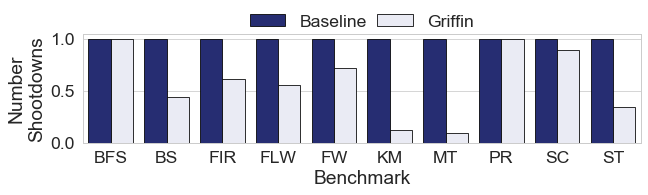

In [4]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=stacked_data, 
            x='Benchmark', hue='Configuration', y='Speedup', 
            palette=['#1A237E', '#E8EAF6'], ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.33), loc=9, ncol=2)
# ax.set_ylim(0.9, 2.0)
ax.set_ylabel('Number\nShootdowns')
# ax.text(1.25, 1.6, 2.29, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(5.25, 1.6, 8.33, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(6.25, 1.6, 10.67, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))
# ax.text(9.25, 1.6, 2.88, 
#         horizontalalignment='center', verticalalignment='center',
#         fontsize=18, bbox=dict(facecolor='white'))

plt.savefig('shootdown.pdf', bbox_inches='tight')
plt.show()
plt.close()